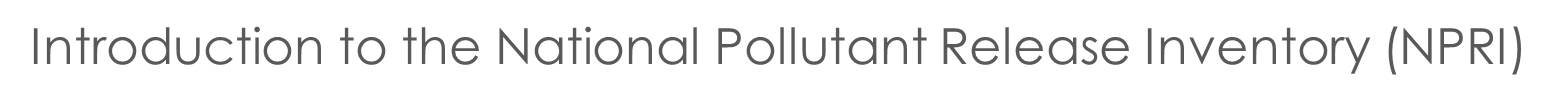

**Introduction**

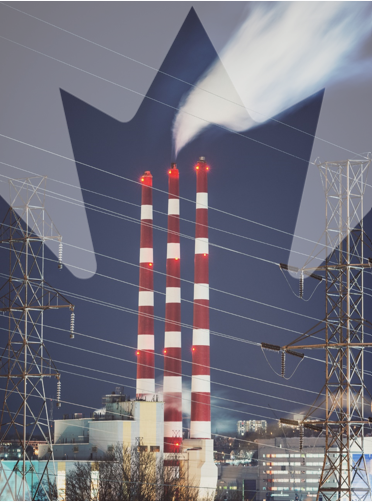

The National Pollutant Release Inventory (NPRI) in Canada serves as a comprehensive database that monitors the release, disposal, and transfer of more than 320 pollutants from over 7,000 facilities nationwide. These facilities encompass a range of industries including manufacturing, mining, oil and gas, power generation, and sewage treatment.

The data reported by facility owners and operators to the NPRI serves several purposes:

Enhancing public awareness: By providing information on pollutant releases, the NPRI enables Canadians to better understand the environmental impact within their communities.

Promoting pollution reduction measures: The inventory encourages stakeholders to take proactive steps to mitigate pollution, thereby contributing to environmental sustainability.

Monitoring progress: By tracking pollutant data over time, the NPRI helps assess the effectiveness of pollution control efforts and environmental policies.

In essence, the NPRI plays a crucial role in facilitating informed decision-making, fostering environmental stewardship, and promoting accountability in pollution management across Canada.

# **Import Libraries**



In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing the Dataset with read_csv**

In [98]:
df= pd.read_csv('NPRI_Data_2022_unclean.csv')

In [99]:
df.head()

,IssueID,ReportID,Priority,IssueType,ReportYear,NpriID,CompanyName,FacilityName,NAICS,Category,...,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,NumOfEmployees,SubstanceComments
0,57733,335210,6,Trend,2022,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,...,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568320,5,Nature of activities results in annual variati...
1,57740,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,...,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126130,6,Nature of treating wastewater changes daily. T...
2,57745,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,...,-8.7418,2.762950,264.082094,-0.312018,846.184135,166,43837.627690,46252.286540,6,Quantities change year to year due to the natu...
3,57746,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,...,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6,Nature of treating wastewater changes daily. t...
4,57765,335221,6,Trend,2022,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,...,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654800,16,NaN


In [100]:
df.shape

(14818, 30)

In [101]:
df['CompanyName'].unique()

array(['City of Kawartha Lakes', 'City of Owen Sound',
       'Heidelberg Materials Canada Limited', ...,
       'Canlin Energy Corporation', 'Obsidian Energy Ltd.',
       'Resourceful Petroleum Canada Limited'], dtype=object)

# Accessing specific coloums which are needed.

In [102]:
df = df.drop(columns=['ReportYear','SubstanceComments','IssueID','ReportID' ])

In [103]:
duplicate_rows = df.duplicated() #removing the duplicated values to increase the accuracy

In [104]:
display(duplicate_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
14813    False
14814    False
14815    False
14816    False
14817    False
Length: 14818, dtype: bool

In [105]:
df_cleaning = df[~duplicate_rows]

In [106]:
df_cleaning

,Priority,IssueType,NpriID,CompanyName,FacilityName,NAICS,Category,Sub-Category,Cas,SubstanceName,...,PercentChange,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,NumOfEmployees
0,6,Trend,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,...,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568320,5
1,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),...,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126130,6
2,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),...,-0.993522,-8.7418,2.762950,264.082094,-0.312018,846.184135,166,43837.627690,46252.286540,6
3,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),...,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6
4,6,Trend,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,...,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654800,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,6,Trend,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,NaN,71-43-2,Benzene,...,-0.952000,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.552000,2
14814,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,Storage / Handling,NA - M16,Volatile Organic Compounds (Total),...,2.062667,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430880,297092.019400,2
14815,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,NaN,71-43-2,Benzene,...,2.075000,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.552000,2
14816,6,Trend,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,Fugitive,NA - M08,Total particulate matter,...,1.647826,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654800,114


In [107]:
df_cleaning = df_cleaning.reset_index()
df_cleaning

,index,Priority,IssueType,NpriID,CompanyName,FacilityName,NAICS,Category,Sub-Category,Cas,...,PercentChange,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,NumOfEmployees
0,0,6,Trend,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,...,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568320,5
1,1,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,...,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126130,6
2,2,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,...,-0.993522,-8.7418,2.762950,264.082094,-0.312018,846.184135,166,43837.627690,46252.286540,6
3,3,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,...,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6
4,4,6,Trend,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,...,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654800,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14800,14813,6,Trend,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,NaN,71-43-2,...,-0.952000,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.552000,2
14801,14814,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,Storage / Handling,NA - M16,...,2.062667,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430880,297092.019400,2
14802,14815,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,NaN,71-43-2,...,2.075000,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.552000,2
14803,14816,6,Trend,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,Fugitive,NA - M08,...,1.647826,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654800,114


In [108]:
df.duplicated().unique()

array([False,  True])

In [109]:
df.isnull().sum()

Priority                    0
IssueType                   0
NpriID                      0
CompanyName                 0
FacilityName                0
NAICS                       0
Category                    0
Sub-Category             3277
Cas                         0
SubstanceName               0
Units                       0
CurrentYear                 0
YearMinus1                108
YearMinus2               2664
YearMinus3               4156
YearMinus4               5181
PercentChange             110
DifferenceChange            0
FourYearAvg                77
NAICSSubstanceAvg           0
NumStandardDeviation      781
StandardDeviation           0
NAICSSubstanceCount         0
NAICSSubstanceTotal         0
OverallSubstanceTotal       0
NumOfEmployees              0
dtype: int64

# We are using the mode to handle missing values in categorical variables.
# Mode represents the most frequent value in the dataset, which can be a suitable choice for filling missing categorical data.

In [110]:
df_temp = df.copy()
mode = (df_temp["Sub-Category"].mode()[0])
df_temp["Sub-Category"]= df_temp["Sub-Category"].fillna(mode)#here we are replacing all the empty values with the mode of whole column
df_temp # we have put [0] after mode because the whole column has different values and frequecy is 1 so this will replace it the order from ascending to descending.

,Priority,IssueType,NpriID,CompanyName,FacilityName,NAICS,Category,Sub-Category,Cas,SubstanceName,...,PercentChange,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,NumOfEmployees
0,6,Trend,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,...,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568320,5
1,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),...,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126130,6
2,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),...,-0.993522,-8.7418,2.762950,264.082094,-0.312018,846.184135,166,43837.627690,46252.286540,6
3,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),...,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6
4,6,Trend,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,...,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654800,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,6,Trend,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,-0.952000,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.552000,2
14814,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,Storage / Handling,NA - M16,Volatile Organic Compounds (Total),...,2.062667,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430880,297092.019400,2
14815,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,2.075000,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.552000,2
14816,6,Trend,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,Fugitive,NA - M08,Total particulate matter,...,1.647826,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654800,114


# We have utilized the mean function in the 'dataset' to calculate the average values of a particular variable.


In [111]:
# df_temp = df.copy()
mean = df_temp["FourYearAvg"].mean()
df_temp["FourYearAvg"]= df_temp["FourYearAvg"].fillna(mean)
df_temp #here we are replacing all the empty values with the mean of whole column


,Priority,IssueType,NpriID,CompanyName,FacilityName,NAICS,Category,Sub-Category,Cas,SubstanceName,...,PercentChange,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,NumOfEmployees
0,6,Trend,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,...,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568320,5
1,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),...,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126130,6
2,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),...,-0.993522,-8.7418,2.762950,264.082094,-0.312018,846.184135,166,43837.627690,46252.286540,6
3,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),...,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6
4,6,Trend,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,...,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654800,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,6,Trend,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,-0.952000,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.552000,2
14814,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,Storage / Handling,NA - M16,Volatile Organic Compounds (Total),...,2.062667,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430880,297092.019400,2
14815,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,2.075000,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.552000,2
14816,6,Trend,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,Fugitive,NA - M08,Total particulate matter,...,1.647826,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654800,114


# **Median**


# We determine whether to use the median by checking the skewness of the dataset. Skewness helps us understand the asymmetry of the distribution. If the distribution is highly skewed, meaning it deviates significantly from a normal distribution, using the median as a measure of central tendency is often more appropriate than the mean.
#By incorporating the median, we ensure robustness against outliers and non-normality in the dataset, thus providing a more accurate representation of the central tendency.


In [112]:

column_name = 'PercentChange'

# Check the skewness of the selected column
skewness = df_temp[column_name].skew()

print(f"Skewness of '{column_name}': {skewness}")


Skewness of 'PercentChange': 72.40687903717384


In [113]:
# df_temp = df.copy()
median = df_temp["PercentChange"].median()
df_temp["PercentChange"]= df_temp["PercentChange"].fillna(median)
df_temp#here we are replacing all the empty values with the median of whole column

,Priority,IssueType,NpriID,CompanyName,FacilityName,NAICS,Category,Sub-Category,Cas,SubstanceName,...,PercentChange,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,NumOfEmployees
0,6,Trend,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,...,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568320,5
1,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),...,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126130,6
2,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),...,-0.993522,-8.7418,2.762950,264.082094,-0.312018,846.184135,166,43837.627690,46252.286540,6
3,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),...,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6
4,6,Trend,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,...,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654800,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,6,Trend,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,-0.952000,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.552000,2
14814,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,Storage / Handling,NA - M16,Volatile Organic Compounds (Total),...,2.062667,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430880,297092.019400,2
14815,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,2.075000,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.552000,2
14816,6,Trend,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,Fugitive,NA - M08,Total particulate matter,...,1.647826,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654800,114


In [114]:
# df_temp.set_index("",inplace= True)
df_temp['NumStandardDeviation'] = df_temp["NumStandardDeviation"].interpolate(method='index')
#this will fill the empty cell with the mean of next and previous value recorded.

In [115]:
df_temp.isnull().sum()

Priority                    0
IssueType                   0
NpriID                      0
CompanyName                 0
FacilityName                0
NAICS                       0
Category                    0
Sub-Category                0
Cas                         0
SubstanceName               0
Units                       0
CurrentYear                 0
YearMinus1                108
YearMinus2               2664
YearMinus3               4156
YearMinus4               5181
PercentChange               0
DifferenceChange            0
FourYearAvg                 0
NAICSSubstanceAvg           0
NumStandardDeviation        0
StandardDeviation           0
NAICSSubstanceCount         0
NAICSSubstanceTotal         0
OverallSubstanceTotal       0
NumOfEmployees              0
dtype: int64

Handling Outliers


In [116]:
df_temp.fillna(df_temp.mean())

<ipython-input-116-5163d04616bd>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,Priority,IssueType,NpriID,CompanyName,FacilityName,NAICS,Category,Sub-Category,Cas,SubstanceName,...,PercentChange,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,NumOfEmployees
0,6,Trend,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,...,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568320,5
1,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),...,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126130,6
2,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),...,-0.993522,-8.7418,2.762950,264.082094,-0.312018,846.184135,166,43837.627690,46252.286540,6
3,6,Trend,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),...,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6
4,6,Trend,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,...,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654800,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,6,Trend,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,-0.952000,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.552000,2
14814,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,Storage / Handling,NA - M16,Volatile Organic Compounds (Total),...,2.062667,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430880,297092.019400,2
14815,6,Trend,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,Stack / Point,71-43-2,Benzene,...,2.075000,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.552000,2
14816,6,Trend,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,Fugitive,NA - M08,Total particulate matter,...,1.647826,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654800,114


In [117]:
import plotly.express as px
fig =px.box(df_temp, x= "CurrentYear", y="Category", title ="Outliers in unclean data")
fig.show()

In [118]:
df_temp= df_temp.query("CurrentYear < 100000").copy()
import plotly.express as px
fig =px.box(df_temp, x= "CurrentYear", y="Category", title ="Outliers in unclean data")
fig.show()

# **Data Visualizations**

<ipython-input-121-5d959e0dd7d7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



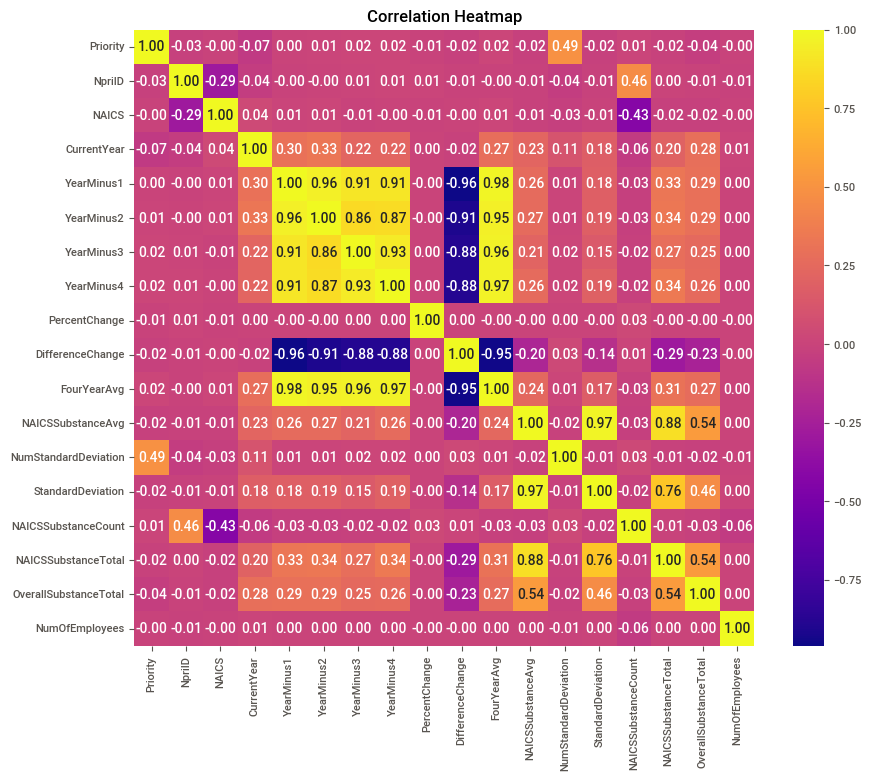

In [121]:
import seaborn as sns
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(df_temp.corr(), annot=True, cmap='plasma', fmt=".2f")  # Adjust the parameters as needed
plt.title('Correlation Heatmap')  # Add a title to the heatmap
plt.show()

In [140]:
import plotly.express as px

# Define a custom color palette
custom_colors = px.colors.qualitative.Bold

# Create a bar chart using plotly express with color representation
bar_chart = px.bar(
    df_temp,
    x='Category',
    y='OverallSubstanceTotal',
    color='Category',  # Use the same column for both x-axis and color for consistency
    color_discrete_sequence=custom_colors,  # Apply the custom color palette
    title='Emissions by Category Over Years',
    labels={'OverallSubstanceTotal': 'Quantity of Pollutant Released'},
)

# Update y-axis label
bar_chart.update_yaxes(title_text="Quantity of pollutant released")

# Show the plot
bar_chart.show()


In [147]:
# Create a scatter plot with CurrentYear on the x-axis and PercentChange on the y-axis, colored by Category
fig = px.scatter(df_temp, x="CurrentYear", y="YearMinus1", color="Category", title="NPRI Data 2022: Current Year vs. Previous year")
# Show the plot
fig.show()